## Реальный генетический алгоритм ##

*   Реальный генетический алгоритм
*   Рулеточный отбор
*   Симметричное скрещивание
*   Примеры: сферическая и функция Леви

**Шаги генетического алгоритма:** </br>
НАЧАЛО
<br>
Инициализация начальной популяции
<br>
Вычисление функции приспособленности
<br>
Повторять: <br>

*   Отбор
*   Скрещивание
*   Мутация
*   Вычисление функции приспособленности

ПОКА популяция не сойдется <br>
СТОП<br>

# 1. Библиотеки

Сначала необходимо загрузить библиотеки Python:

In [6]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import math

from mpl_toolkits import mplot3d

pi = 3.1415

# 2. Генерация популяции

**Начальная популяция**

Генетический алгоритм начинается созданием набора особей, который называется популяцией. Каждая особь представляет потенциальное решение.

In [7]:
def generate_inital_chromosomes(length, max, min, pop_size):
  return [ [random.uniform(min,max) for j in range(length)] for i in range(pop_size)]

def population_stats(costs):
  return costs[0], sum(costs)/len(costs)

# 3. Функции ранжирования и **выбора** особей

Особи ранжируются (сортируются) по значению функции приспособленности с использованием функции **rank_chromosomes**.</br>
Реализованы следующие типы выбора: естественный и рулеточный. </br>
Естественный выбор реализован в функции **natural_selection**, где оставляются только первые *n_keep* особей.</br>
Функция **roulette_selection** представляет рулеточный тип выбора.

In [8]:
def rank_chromosomes(cost, chromosomes):
  costs = list(map(cost, chromosomes))
  ranked  = sorted( list(zip(chromosomes,costs)), key = lambda c:c[1])
  
  return list(zip(*ranked))

def natural_selection(chromosomes, n_keep):
  return chromosomes[:n_keep]

def roulette_selection(parents):

  pairs = []
  i = 0

  for i in range(0, len(parents), 2):

    weights=[];
    for i in range(len(parents)):
        weights.append((len(parents)-i)*random.random()) #za minimum
      #  weights.append((i+1)*random.random()) #za maksimum
    if (weights[0]>=weights[1]):
        maxInd1=0;
        maxInd2=1;
    else:
        maxInd1=1;
        maxInd2=0;
    
    for i in range(2,len(parents)):
        if weights[i]>weights[maxInd1]:
            maxInd2=maxInd1
            maxInd1=i
        elif weights[i]>weights[maxInd2]:
            maxInd2=1
    pairs.append([parents[maxInd1], parents[maxInd2]])
      
  return pairs

In [9]:
def ruletskaSelekcija(roditelje, kriterijumOptimalnosti):
  for i in range(length(roditelja)):
    roditeljiScore[i] = kriterijumOptimalnosti[i] * rand(0,1)
  
  roditeljiScore.sort()
  roditelj1 = roditeljScore[1]
  rodtelj2 = roditeljScore[2]
          

# 4. Скрещивание
a, b - родители </br>
y1, y2 - потомки </br>
(a, b) -> (y1, y2) </br>
**Симметричное скрещивание** </br>
y1 = r * a + (1 - r) * b</br>
y2 = (1 - r) * a + r * b,</br>
где r - случайное число, выбранное из интервала (0, 1).

In [10]:
def crossover(pairs):

  children = []
  
  for a,b in pairs:

    r=random.random()
    y1=[]
    y2=[]
    for i in range(0,len(a)):
      y1.append(r * a[i] + (1 - r) * b[i])
      y2.append((1 - r) *  a[i] + r*b[i])
    children.append(y1)
    children.append(y2)
      
  
  return children 

In [11]:
crossover([[[-0.5, -0.5], [-7.04, -2.5]],[[-1.5, -1.05], [-9.04, -9.5]]])

[[-2.83061011285066, -1.212724805153107],
 [-4.7093898871493405, -1.787275194846893],
 [-2.812681303378927, -2.521108357235004],
 [-7.727318696621072, -8.028891642764997]]

# 5. Мутация

Мутация представляет собой случайное изменение некоторых генов конкретной особи. Поскольку мутация действует только на одну особь, мутация является унарным оператором, который приводит к изменению самой особи. Мутация применяется к каждой особи с определенной низкой вероятностью. Если вероятность мутации слишком низкая или вообще не применяется, может произойти преждевременная локальная сходимость. Если значение вероятности мутации велико, генетический алгоритм сводится к случайному поиску, что не имеет смысла.

In [12]:
def mutation(chromosomes, mutation_rate, mutation_width):
  mutated_chromosomes = [] 
  for chromosome in chromosomes: 
    y1=[]
    for i in range(0,len(chromosome)):
      if random.random() < mutation_rate:
        r=random.random()  
            
        y1.append( chromosome[i] + mutation_width * 2 * (r - 0.5) )        
      else:
        y1.append(chromosome[i])
      
    mutated_chromosomes.append(y1)
  return mutated_chromosomes  

In [13]:
mutation([[-0.23170627655571208, 2.8058402091757224], [-2.538231077587461, 0.14136977843141585]], 0.3, 1)

[[-0.23170627655571208, 3.406742994536618],
 [-2.2834216114727734, 0.14136977843141585]]

# 6. Элитизм

Существует возможность потерять хорошее решение, полученное после многих итераций, из-за генетических операторов мутации или селекции. Поэтому возникает необходимость защиты лучших особей от изменения или удаления во время эволюционного процесса. Такой механизм называется **элитизм**.

In [14]:
def elitis(chromosomes_old,chromosomes_new, elitis_rate, population_size):
 
  old_ind_size=int(np.round(population_size*elitis_rate))
  return chromosomes_old[:old_ind_size]+chromosomes_new[:(population_size-old_ind_size)]

# 7. Определение функции

Мы определим функцию, для которой ищем оптимум (минимум).

## Пример 1: Сферическая функция

В качестве первого примера мы будем использовать сферическую функцию, которая определяется следующим образом:


\begin{equation}
f(x, y) = x^2 +y ^2 \\
\text{интервал: }  -10 < x, y < 10,\\
\text{минимум: } f(0,0) = 0 
\end{equation}

## Пример 2: Функция Леви
В качестве второго примера мы будем использовать функцию Леви, которая определяется следующим образом:


\begin{equation}
f(x, y) = \sin^2(3\pi x) + (x − 1)^2(1 + \sin^2(3\pi y)) + (y − 1)^2(1 + \sin^2(2\pi y)) \\
 \text{интервал: } -10 < x, y < 10,\\
  \text{минимум: } f(1,1) = 0 
\end{equation}

In [15]:
def sphera_function(chromosome):
  x = chromosome[0]
  y = chromosome[1] 
  
  tmp1 = math.pow(x, 2)
  tmp2 = math.pow(y, 2)


  return tmp1 + tmp2 

In [16]:
def levy_function(chromosome):
  x = chromosome[0]
  y = chromosome[1] 
  
  tmp1 = math.pow(math.sin(3*pi*x), 2)
  tmp2 = math.pow((x - 1), 2) * (1 + math.pow(math.sin(3*pi*y), 2))
  tmp3 = math.pow((y - 1), 2) * (1 + math.pow(math.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3

# 7.1. 3D Представление функции

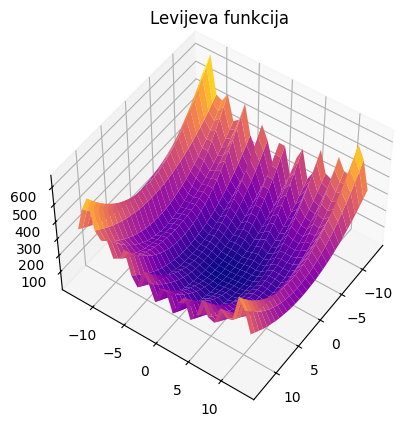

In [17]:
def l_show(x, y):
  tmp1 = math.pow(math.sin(3*pi*x), 2)
  tmp2 = math.pow((x - 1), 2) * (1 + math.pow(math.sin(3*pi*y), 2))
  tmp3 = math.pow((y - 1), 2) * (1 + math.pow(math.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3

levy_vectorized = np.vectorize(l_show)

x = np.linspace(-13, 13, 30)
y = np.linspace(-13, 13, 30)

X, Y = np.meshgrid(x, y)
Z = levy_vectorized(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('Levijeva funkcija');

ax.view_init(50, 35)

# 8. Основной цикл - полный генетический алгоритм
- Генерируем начальную популяцию размером *population_size*
- Запускаем основной цикл не более *max_iter* раз, каждая итерация представляет собой одно поколение
- Ранжируем особи по приспособленности с помощью функции **rank_chromosomes**

- Функцией **roulette_selection** выбираем пары родительских хромосом для скрещивания
- С использованием метода *скрещивания*, т.е. функции **crossover**, объединяем родительские хромосомы и получаем популяцию потомков
- Объединяем новообразованные хромосомы с родительскими в новую популяцию *chromosomes*
- На этой популяции выполняем *мутацию* функцией **mutation** с установленной *mutation_rate = 0.3*

- Проверяем, сходится ли популяция или достигли ли мы оптимального решения
- Выводим статистику для каждого поколения: среднее значение приспособленности, лучшая хромосома и состав лучшей хромосомы

In [18]:
def genetic(cost_func , extent, population_size, mutation_rate = 0.8,elitis_rate=0.1, chromosome_length = 2, precision = 13, max_iter = 100):

  min_val = extent[0]
  max_val = extent[1]

  
  avg_list = []
  best_list = []
  curr_best = 10000
  same_best_count = 0



  
  chromosomes = generate_inital_chromosomes(chromosome_length, max_val, min_val, population_size)
  print("Tip: ", type(chromosomes))
  for iter in range(max_iter):
      
    ranked_parents, costs = rank_chromosomes(cost_func, chromosomes)     
    best, average = population_stats(costs)
    parents = natural_selection(ranked_parents, population_size)  

    pairs = roulette_selection (parents)  
        
    children = crossover(pairs)   
    print(children)   
    chromosomes = mutation(children, mutation_rate,1)

    ranked_children, costs = rank_chromosomes(cost_func, chromosomes)
    chromosomes=elitis(ranked_parents,ranked_children, elitis_rate, population_size)
    print("Generation: ",iter+1," Average: {:.3f}".format(average)," Curr best: {:.3f}".format(best), 
         "[X, Y] = {:.3f} {:.3f}".format(chromosomes[0][0],chromosomes[0][1]))
    print("-------------------------")
    
    avg_list.append(average)
    if best < curr_best:
      best_list.append(best)
      curr_best = best
      same_best_count = 0
    else:
      same_best_count += 1
      best_list.append(best)
      
    ##
    if (cost_func(chromosomes[0]) < 0.005):
      
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
     
      print("\nSolution found ! Chromosome content: [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      return
        
    if same_best_count > 20:
      print("\nStopped due to convergance.Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
      
      return
    
    if iter == 499:
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
      
      print("\nStopped due to max number of iterations, solution not found. Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))

In [19]:
all_avg_list = []
generations_list = []
all_best_list = []
genetic(sphera_function, [-10, 10], 50)

Tip:  <class 'list'>
[[-0.6447283297954861, -0.03825104941695823], [0.11518326690915481, -1.1738957232000562], [-0.5447272957403348, 0.5484011140045947], [-0.2512125389986956, -0.06341346977484763], [0.061461072622403856, -1.906829657068336], [-1.0486474442444094, -1.6552393568129364], [-1.0392419409272342, 0.5513271109369273], [0.5096968780409028, -1.7634738835539419], [-0.39731022334351523, 2.7362508092425153], [-1.3611091849486332, -0.42934708345108785], [0.5109044323327971, -0.591157342886599], [0.12365890146692497, 2.3557255785512394], [1.479205095588206, 3.3356890524770715], [0.8585146772590342, -0.972159381035691], [0.7028981852349325, -2.0522022520040295], [0.7028981852349325, -2.0522022520040295], [0.6928837094511675, -2.049932613557827], [-1.680070081073173, -1.5121364003234454], [-0.33050556632221895, -0.5078391031685833], [-0.19903949656411246, -0.7043076694484312], [-0.17323030943293988, -1.85364019461352], [-0.8139560621890658, -1.7084288192677521], [0.6251922328218005, -

# 9. Построение графиков</br>
Рисуем среднюю и лучшую приспособленность для каждого поколения.

In [20]:
def display_stats(all_avg_list, all_best_list, generations_list):
  
  c = 0
  colors = ['red', 'green', 'blue', 'yellow', 'orange']
  
  for average_list in all_avg_list:
      x_axis = list(range(generations_list[c]))
      y_axis = average_list
      plt.plot(x_axis, y_axis, linewidth=3, color=colors[c], label=str(c + 1))
      plt.title('Average cost function value', fontsize=19)
      plt.xlabel('Generation', fontsize=10)
      plt.ylabel('Cost function')
      c += 1
  plt.legend(loc='upper right')
  plt.show()

  c = 0

  for best_list in all_best_list:
      x_axis = list(range(generations_list[c]))
      y_axis = best_list
      plt.plot(x_axis, y_axis, color=colors[c], label=str(c + 1))
      plt.title('Best cost function value', fontsize=19)
      plt.xlabel('Generation')
      plt.ylabel('Cost function')
      c += 1
  plt.legend(loc='upper right')
  plt.show()

# 10. Конфигурирование и вызов генетического алгоритма

Аргументы функции:


1.   Функция для минимизации (в нашем случае Levy_function) - *function*
2.   Диапазон, в котором мы ищем решение - *list*
3.   Количество хромосом (особей) - *int*


---

Опциональные аргументы:


4.   Скорость мутации - *float*
5.   Скорость элитизма - *float*
7.   Максимальное количество итераций - *int*


 1 : run of genetic algorithm with  20  chromosomes.

Tip:  <class 'list'>
[[-0.5553385098805115, 1.181289078897355], [0.8760015074047849, 3.5429687464808657], [0.7248153953753388, 3.2935149741493], [-0.4041523978510655, 1.4307428512289206], [-1.4710939866890997, -0.544214171694543], [0.294044437480851, 0.011540413163380753], [-0.9135050215624207, -0.3686570484728569], [-0.26354452764582814, -0.16401671005830537], [0.5919181061176091, 2.9401132844621443], [-1.4108373804137941, -0.5618272598253087], [-0.6818666057840849, -0.2957255945793342], [-0.495182943424164, -0.2369481639518281], [-0.008847454346685546, 2.0829873468032094], [0.32951045187095884, 2.641270478575011], [-1.5826968579032408, -0.5793523832428716], [0.4056473086949918, 0.046678624711709374], [1.6978263684533659, 4.8989617608690175], [-1.3771633709290925, -0.1747039354907967], [-2.2444351336809762, -1.8560454912649145], [-2.158692812445754, -1.6795342619118903]]
Generation:  1  Average: 90.823  Curr best: 2.224 [X, Y] = 0

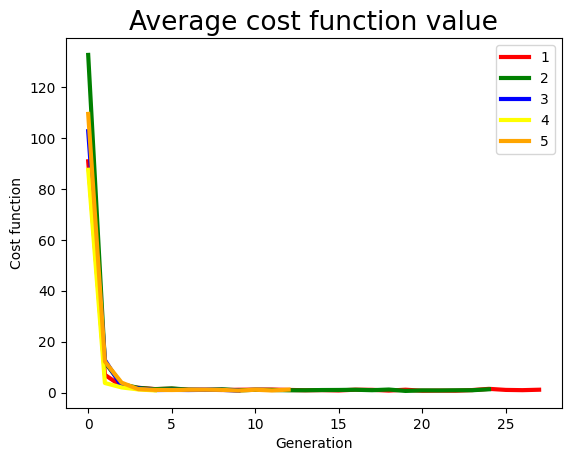

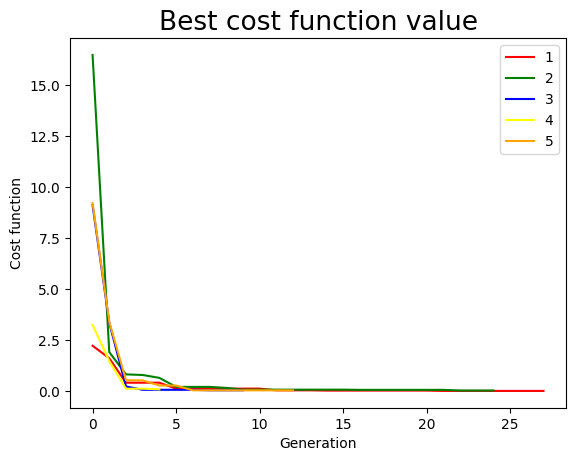


 1 : run of genetic algorithm with  100  chromosomes.

Tip:  <class 'list'>
[[2.5977444467676425, -0.4928741257191357], [1.4398975168706278, -1.2636738805618903], [-0.12416368096453795, 1.2496350371087155], [0.18618781147066393, 1.62942080980831], [0.8727369359678478, 0.9732761255344095], [0.932209608304249, -0.14697901820204118], [2.1621064406923067, -0.6226144480023097], [2.812209827183534, 0.2292201889259895], [2.5920974038891793, 1.6325417103902788], [1.7782899727133734, 1.9708437323854913], [0.09391841919425126, -1.128393603299818], [-1.968744875327175, -0.17126284185995994], [3.144352421303814, 4.503260951415272], [3.0506298636721376, 0.6161376992285461], [1.0717805225945745, 0.4743939372339602], [1.0572864836717115, 0.022405117111170325], [0.7273202280947075, 2.229412597899282], [-1.2506687420564626, -1.928378383061076], [2.399412389450786, -1.787649171628635], [3.17928177850529, -1.9196166345612262], [-0.24362626964043665, 0.31058679363059827], [0.020585339321442242, 0.0008807

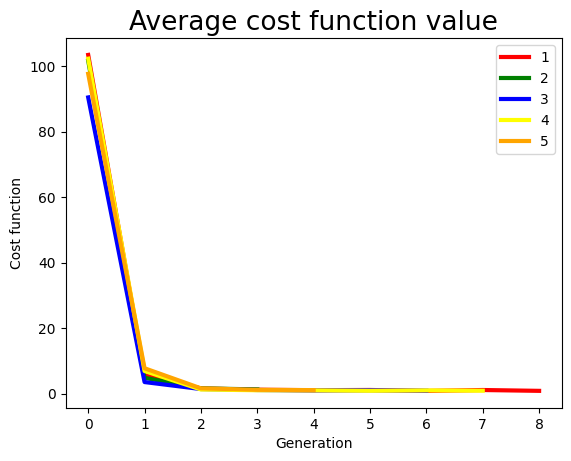

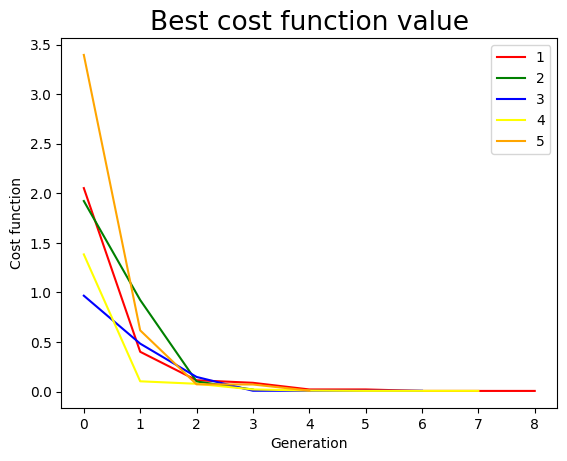


 1 : run of genetic algorithm with  150  chromosomes.

Tip:  <class 'list'>
[[1.1302002481325348, 2.7923018221465408], [-0.48404269819490986, -1.261878195001346], [1.1001711658247848, 0.48602186554277604], [1.0290620574017557, 0.5811280230411172], [3.676394427615138, 1.7617746981791789], [1.6233151721434036, 0.6946736588654567], [0.18342469659299576, 0.9909469715074054], [-2.2506797627688533, 2.4001955062999016], [1.7351913972526785, 0.3989871384375162], [1.3623210220851751, 0.4247246759831297], [-1.2737660137190743, -0.4877414414872367], [0.7783474035075992, 0.30328654078134576], [1.1342304004069543, 0.4404687289575939], [1.1342304004069543, 0.4404687289575939], [1.0281376831601314, 1.5322142517585597], [0.9565046330219775, 2.269353084681124], [1.2777433907035518, 0.6101878027911253], [2.512079597125427, 2.0699190600115496], [0.4477386790176034, 0.564525228836486], [-0.5108887049183111, 0.7377595945743062], [2.6627248677721256, 1.2926329102503848], [2.3425492400810586, 1.488199908215

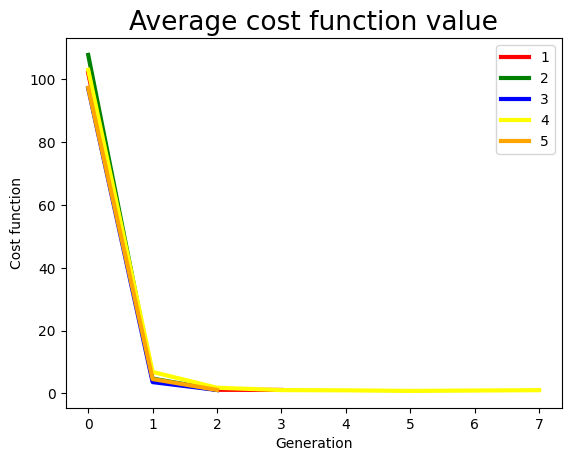

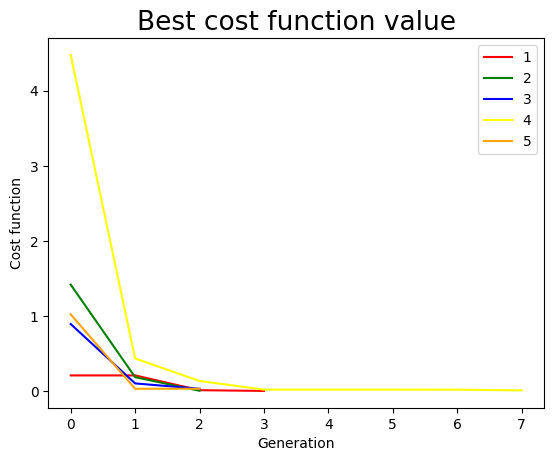

In [21]:
number_of_chromosomes = [20, 100, 150]
all_avg_list = []
generations_list = []
all_best_list = []
run_number = 5

for x in number_of_chromosomes:
  
  print("==========================")
  
  for k in range(0, run_number):
    
    print("\n", k + 1, ": run of genetic algorithm with ", x ," chromosomes.\n")    
    genetic(levy_function, [10, -10], x)
    
  display_stats(all_avg_list, all_best_list, generations_list)
  all_best_list = []
  all_avg_list = []
  generations_list = []